In [119]:
import numpy as np
import matplotlib.pyplot as plt
import skies

%config InlineBackend.figure_format = "retina"

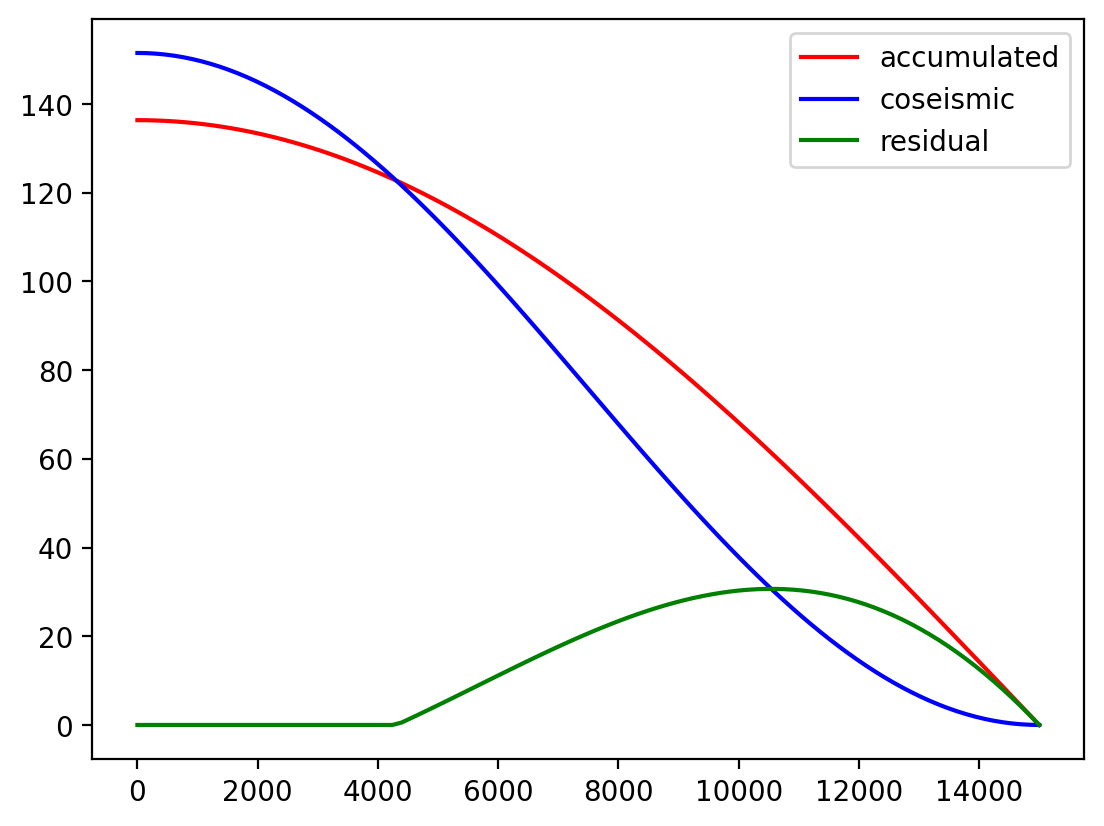

In [146]:
MM2M = 1e-3
Y2S = 365.25 * 24 * 3600
depth = 15e3
years = 30
reference_slip_deficit_rate = 30 * MM2M / Y2S# mm/yr

n_pts = 100
x = np.linspace(0, depth, n_pts)
segment_area = x[1] - x[0]
coseismic_slip = np.cos(x / depth * np.pi / 2.0) ** 2.0
slip_deficit_rate = reference_slip_deficit_rate * np.cos(x / depth * np.pi / 2.0)
# plt.plot(x, coseismic_slip, "-r")
# plt.plot(x, slip_deficit_rate, "-b")

accumulated_geometric_moment = slip_deficit_rate * years * Y2S * segment_area
coseismic_geometric_moment = coseismic_slip * segment_area
residual_geometric_moment = accumulated_geometric_moment - coseismic_geometric_moment
residual_geometric_moment[residual_geometric_moment < 0] = 0
plt.plot(x, accumulated_geometric_moment, "-r", label="accumulated")
plt.plot(x, coseismic_geometric_moment, "-b", label="coseismic")
plt.plot(x, residual_geometric_moment, "-g", label="residual")

plt.legend()
plt.show()


0 0.0 1.0
1 3.168808781402895e-08 6.756294657803449e-05
2 6.33761756280579e-08 4.564751750306342e-09
3 9.506426344208684e-08 3.0840807864793627e-13
4 1.267523512561158e-07 2.0836958541924814e-17
5 1.5844043907014474e-07 1.407806316816778e-21
6 1.9012852688417367e-07 9.511554297531164e-26
7 2.2181661469820262e-07 6.426286348781735e-30
8 2.535047025122316e-07 4.3417884127789345e-34
9 2.851927903262605e-07 2.933440185857128e-38
10 3.168808781402895e-07 1.9819186256692225e-42


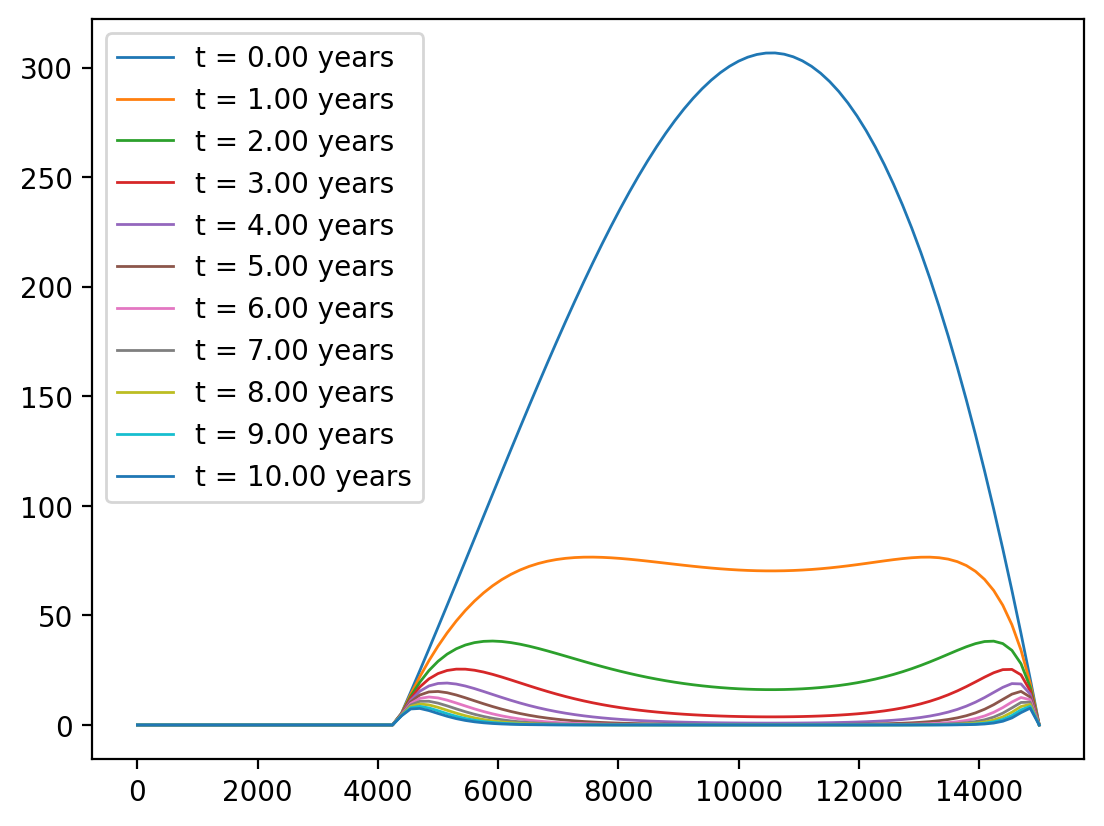

In [161]:
gamma = 0.1
n = n_pts
a = segment_area
c = 100
const = (c**2.0) * gamma / n
t = np.linspace(0, 10 / Y2S, 11)
v = np.zeros((n_pts, len(t)))
for i in range(len(t)):
    print(i, t[i], np.exp(-(c**2.0) * 200 * a * t[i]))
    v[:, i] = const * residual_geometric_moment * np.exp(-(c**2.0) * residual_geometric_moment * a * t[i])

# v = np.cumsum(v, axis=1)
# Plot afterslip velocities
# These seem to be in the wrong order / growing???
for i in range(len(t)):
    plt.plot(x, v[:, i], label="t = {:.2f} years".format(t[i] * Y2S), linewidth=1)

plt.legend()
plt.show()



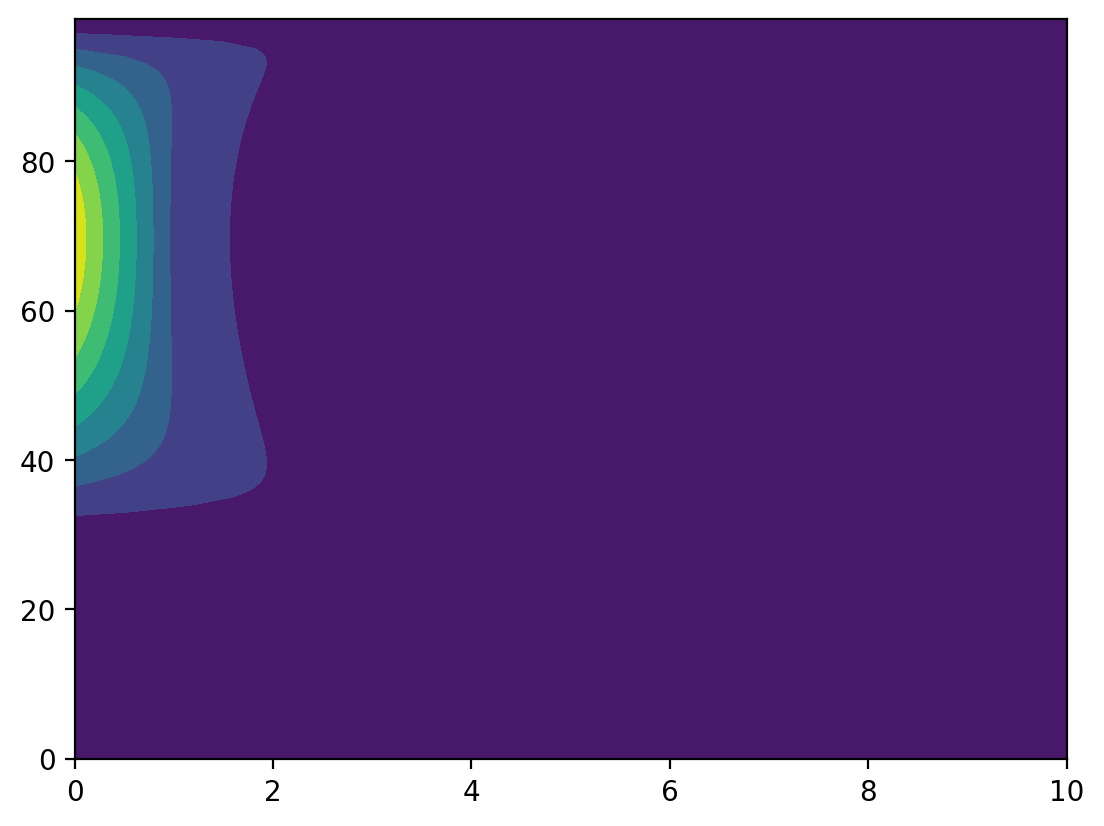

In [164]:
plt.contourf(v)